Number of complete observations: 131
Percentage of complete observations: 87.33333333333333

Rules:
Species should be one of the following values: setosa, versicolor or virginica.
All measured numerical properties of an iris should be positive.
The petal length of an iris is at least 2 times its petal width.
The sepal length of an iris cannot exceed 30 cm.
The sepals of an iris are longer than its petals.


Rule Violations:
Species: 5 violations
Numerical Properties: 0 violations
Petal Ratio: 0 violations
Sepal Length: 0 violations
Sepals Longer: 0 violations


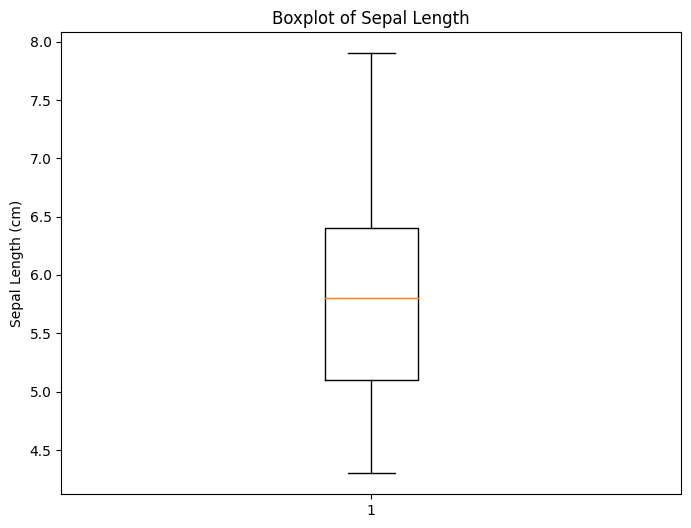

Outliers in Sepal Length: []


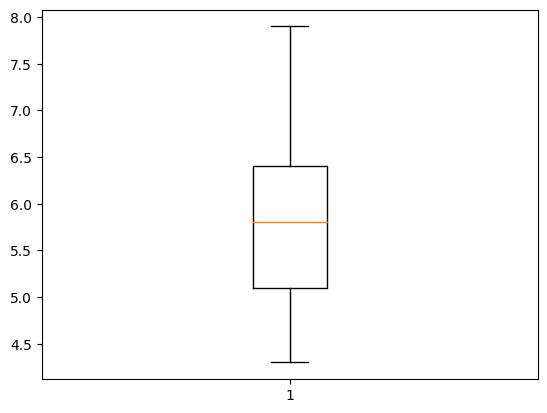

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dirty_iris = pd.read_csv('iris_dirty.csv')


complete_obs_count = dirty_iris.dropna().shape[0]
total_obs_count = dirty_iris.shape[0]
complete_obs_percentage = (complete_obs_count / total_obs_count) * 100

print("Number of complete observations:", complete_obs_count)
print("Percentage of complete observations:", complete_obs_percentage)
print()


dirty_iris.replace(['?', 'NA', 'NaN', np.nan], inplace=True)


with open('rules.txt', 'r') as file:
    rules = file.read()

print("Rules:")
print(rules)
print()


def count_violations(data):
    violations = {
        "Species": sum(~data['Species'].isin(['setosa', 'versicolor', 'virginica'])),
        "Numerical Properties": sum((data[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']] <= 0).any(axis=1)),
        "Petal Ratio": sum(data['Petal.Length'] < 2 * data['Petal.Width']),
        "Sepal Length": sum(data['Sepal.Length'] > 30),
        "Sepals Longer": sum(data['Sepal.Length'] <= data['Petal.Length'])
    }
    return violations

violations = count_violations(dirty_iris)

print("Rule Violations:")
for rule, count in violations.items():
    print(f"{rule}: {count} violations")


plt.figure(figsize=(8, 6))
plt.boxplot(dirty_iris['Sepal.Length'])
plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length (cm)')
plt.show()

stats = plt.boxplot(dirty_iris['Sepal.Length'])
outliers = stats['fliers'][0].get_data()[1]
print("Outliers in Sepal Length:", outliers)
